<a href="https://colab.research.google.com/github/POOJACH76/Cardio_Prediction/blob/main/cardio_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


In [2]:
df=pd.read_excel("/content/dataheartdisease.xlsx")

In [3]:

df['Age'] = df['Age'] / 365



In [4]:
df.head()

,Age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,50.391781,1,156,85.0,140,90,3,1,0,0,1,1
2,50.391781,1,165,64.0,130,70,3,1,0,0,0,1
3,50.391781,2,169,82.0,150,100,1,1,0,0,1,1
4,50.391781,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
columns_to_convert = ["Age", "weight"]
df[columns_to_convert] = df[columns_to_convert].astype(int)

In [6]:
df.head()

,Age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62,110,80,1,1,0,0,1,0
1,50,1,156,85,140,90,3,1,0,0,1,1
2,50,1,165,64,130,70,3,1,0,0,0,1
3,50,2,169,82,150,100,1,1,0,0,1,1
4,50,1,156,56,100,60,1,1,0,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Age          70000 non-null  int64
 1   gender       70000 non-null  int64
 2   height       70000 non-null  int64
 3   weight       70000 non-null  int64
 4   ap_hi        70000 non-null  int64
 5   ap_lo        70000 non-null  int64
 6   cholesterol  70000 non-null  int64
 7   gluc         70000 non-null  int64
 8   smoke        70000 non-null  int64
 9   alco         70000 non-null  int64
 10  active       70000 non-null  int64
 11  cardio       70000 non-null  int64
dtypes: int64(12)
memory usage: 6.4 MB


In [8]:
X = df.drop("cardio", axis=1)
y = df["cardio"]

In [9]:
df["cardio"].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [11]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

xgb_model_scaled = XGBClassifier(random_state=42)
xgb_model_scaled.fit(X_train_scaled, y_train)
xgb_y_pred_scaled = xgb_model_scaled.predict(X_test_scaled)
xgb_accuracy = metrics.accuracy_score(y_test, xgb_y_pred_scaled)
print(f"xgb_accuracy: {xgb_accuracy * 100:.2f}%")

xgb_accuracy: 73.20%


In [12]:
from xgboost import XGBClassifier
from sklearn import metrics
xgb_model_l2 = XGBClassifier(random_state=42, reg_lambda=1.0)
xgb_model_l2.fit(X_train, y_train)


xgb_y_pred_l2 = xgb_model_l2.predict(X_test)

xgb_accuracy_l2 = metrics.accuracy_score(y_test, xgb_y_pred_l2)
print(f"XGBoost with L2 (Ridge) Regularization Accuracy: {xgb_accuracy_l2 * 100:.2f}%")


XGBoost with L2 (Ridge) Regularization Accuracy: 73.20%


In [13]:
def get_scores(model, actual, predicted):
    print(f"Model: {model}")


    accuracy = metrics.accuracy_score(actual, predicted)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    conf_matrix = metrics.confusion_matrix(actual, predicted)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Model: XGBoost with L2 (Ridge) Regularization Accuracy
Accuracy: 73.20%


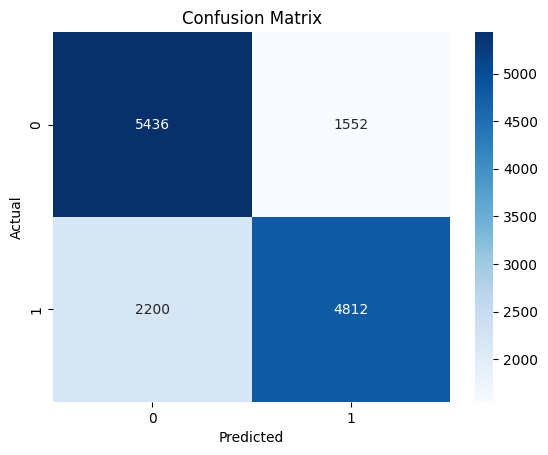

In [14]:
get_scores("XGBoost with L2 (Ridge) Regularization Accuracy", y_test, xgb_y_pred_l2)

In [15]:
import pickle


# Define the filename for the pickle file
filename = "xgb_model_l2.pkl"
# Pickle the best XGBoost model
with open('xgb_model_l2.pkl', 'wb') as model_file:
    pickle.dump(xgb_model_l2, model_file)

In [16]:
import pandas as pd

# Load the saved model from the pickle file
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

unseen_data = pd.read_csv("/content/CARDIOUNSEEN (1).csv")

X_unseen = unseen_data.drop(['cardio'], axis=1)


if loaded_model is not None:

    y_pred = loaded_model.predict(X_unseen)

    y_true = unseen_data['cardio']  # Assign the true labels
    unseen_accuracy = metrics.accuracy_score(y_true, y_pred)
    print(f"XGBoost on Unseen Data: {unseen_accuracy * 100:.2f}%")

    confusion_matrix_unseen = metrics.confusion_matrix(y_true, y_pred)

    print("Accuracy on Unseen Data:", unseen_accuracy)
    print("Confusion Matrix for Unseen Data:")
    print(confusion_matrix_unseen)
else:
    print("The model has not been loaded correctly.")

XGBoost on Unseen Data: 70.59%
Accuracy on Unseen Data: 0.7058823529411765
Confusion Matrix for Unseen Data:
[[12  5]
 [ 0  0]]
